In [1]:
import tensorflow as tf
print(tf.__version__)

2023-07-01 19:22:23.081893: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 19:22:23.611235: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [3]:
# Setup gpu drivers
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

### Data to view and fit

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

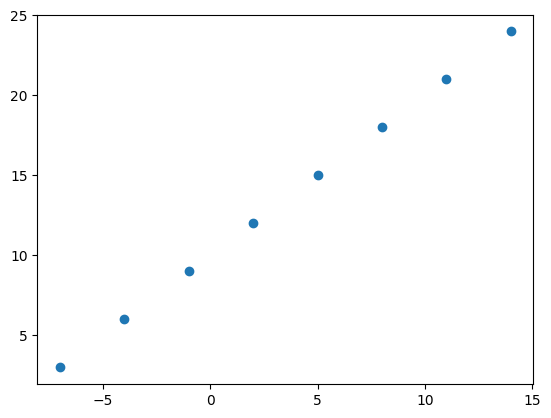

In [6]:
# Visualize it
plt.scatter(X, y)

In [7]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [8]:
# Demo tensor for house prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
X.shape, y.shape

((8,), (8,))

In [10]:
# Turn numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

### Modeling with tensorflow

1. Creating a model. Define the input and output layers, as well as the hidden layers of deep learning model.
2. Compiling a model. Define the loss function (the function that tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model. Letting the model to try to find patterns between `X` and `y` (features and labels).

In [11]:
 # Random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # stochasitc gradient descent
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) 

Epoch 1/5
1/1 [==============================] - 0s 152ms/step - loss: 14.7375 - mae: 14.7375
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 14.6050 - mae: 14.6050
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 14.4725 - mae: 14.4725
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 14.3400 - mae: 14.3400
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 14.2075 - mae: 14.2075


In [12]:
model.predict([14.0])

1/1 [==============================] - 0s 46ms/step


array([[-2.44998]], dtype=float32)

### Improving the model

The model can be improved by:
1. **Creating a model** adding more layers, increasing the number of hidden layers. change the activation function of each layer.
2. **Compiling a model** change the optimization function, the learning rate, of the optimization function.
3. **Fitting a model** fit a model for more epochs, or on more data.

In [13]:
# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
1/1 [==============================] - 0s 367ms/step - loss: 13.4869 - mae: 13.4869
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0958 - mae: 13.0958
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.7175 - mae: 12.7175
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.3718 - mae: 12.3718
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 12.0456 - mae: 12.0456
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.7155 - mae: 11.7155
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3747 - mae: 11.3747
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0229 - mae: 11.0229
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.7704 - mae: 10.7704
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5163 - mae: 10.5163
Epoch 11/100
1/1 [==============================] - 0s 2m

1/1 [==============================] - 0s 2ms/step - loss: 3.0864 - mae: 3.0864
Epoch 89/100
1/1 [==============================] - 0s 2ms/step - loss: 3.0855 - mae: 3.0855
Epoch 90/100
1/1 [==============================] - 0s 2ms/step - loss: 3.0417 - mae: 3.0417
Epoch 91/100
1/1 [==============================] - 0s 2ms/step - loss: 3.0089 - mae: 3.0089
Epoch 92/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9967 - mae: 2.9967
Epoch 93/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9762 - mae: 2.9762
Epoch 94/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9238 - mae: 2.9238
Epoch 95/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9210 - mae: 2.9210
Epoch 96/100
1/1 [==============================] - 0s 2ms/step - loss: 2.9052 - mae: 2.9052
Epoch 97/100
1/1 [==============================] - 0s 2ms/step - loss: 2.8773 - mae: 2.8773
Epoch 98/100
1/1 [==============================] - 0s 2ms/step - loss: 2.8386 - ma

### Evaluating a model

In practice, a workflow would be:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> ...
```

When it come to evaluation...

> Visualize, visualize, visualize

Visualize:
- The data: what data are we working with? how does it look like?
- The mode: how the model look like?
- The training of a model: How the model look like when learning?
- The prediction of the model: How the predictions of the model looks like against the ground truth ?

In [14]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [15]:
# Label for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

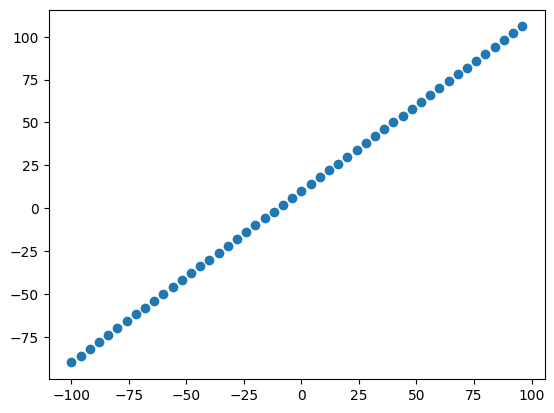

In [16]:
# Visualize the data
plt.scatter(X, y)

In [17]:
# Split the data
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

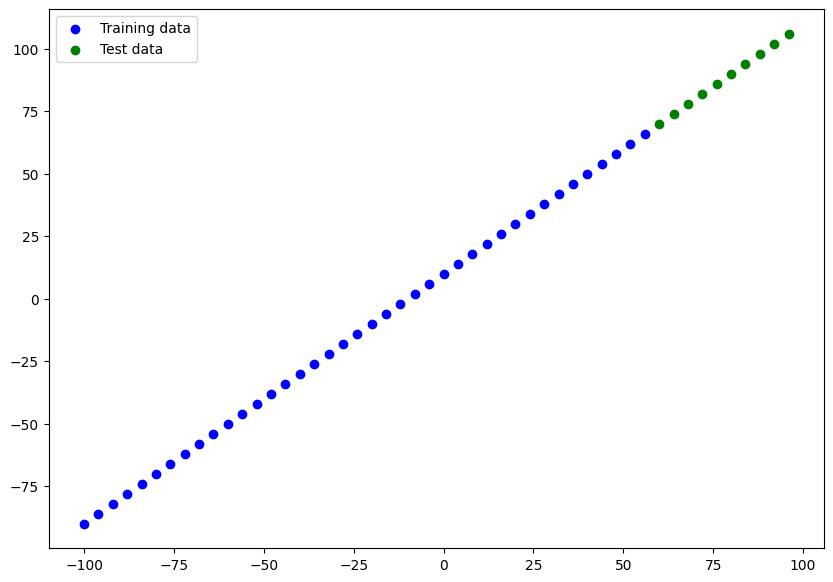

In [18]:
# Visualize the data
plt.figure(figsize=(10, 7))
# Training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
# Legend
plt.legend()

In [22]:
# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)


# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

# Visualize the model
model.summary()


Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 10.6299 - mae: 10.6299
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 10.3165 - mae: 10.3165
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0381 - mae: 10.0381
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 9.8718 - mae: 9.8718
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 9.8135 - mae: 9.8135
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 9.7621 - mae: 9.7621
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 9.7610 - mae: 9.7610
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.7623 - mae: 9.7623
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 9.7680 - mae: 9.7680
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.7611 - mae: 9.7611
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 9

2/2 [==============================] - 0s 1ms/step - loss: 9.0672 - mae: 9.0672
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0644 - mae: 9.0644
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0591 - mae: 9.0591
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0534 - mae: 9.0534
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0568 - mae: 9.0568
Epoch 94/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0393 - mae: 9.0393
Epoch 95/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0275 - mae: 9.0275
Epoch 96/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0152 - mae: 9.0152
Epoch 97/100
2/2 [==============================] - 0s 1ms/step - loss: 9.0097 - mae: 9.0097
Epoch 98/100
2/2 [==============================] - 0s 1ms/step - loss: 8.9889 - mae: 8.9889
Epoch 99/100
2/2 [==============================] - 0s 1ms/step - loss: 8.9767 - ma

- Total params: total number of parameters in the model
- Trainable params: parameters that the model can update as it trains
- Non-trainable params: parameters that are not updated during training

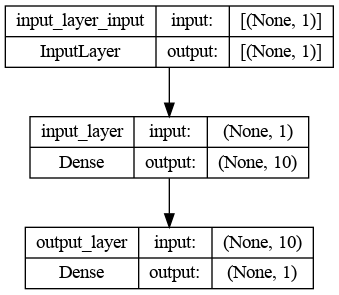

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [25]:
# Visualizing prediction
def plot_prediction(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Test data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

1/1 [==============================] - 0s 9ms/step


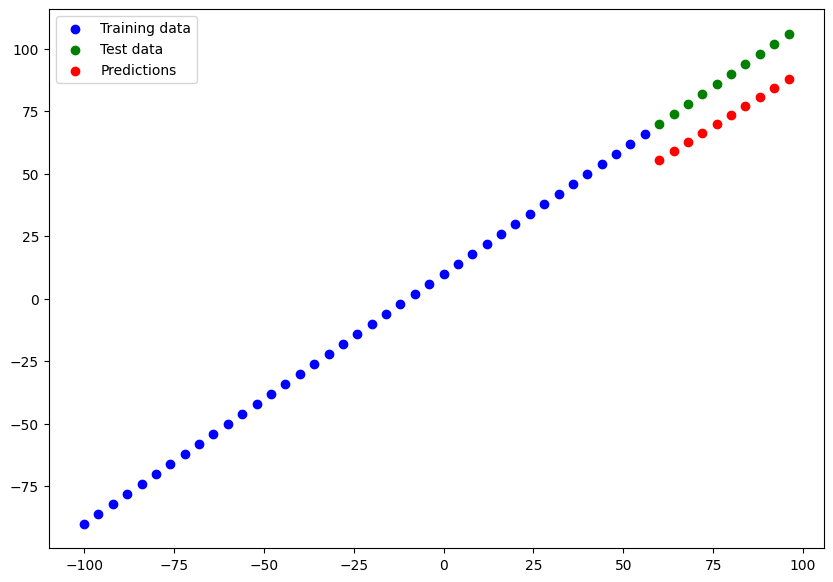

In [27]:
y_pred = model.predict(X_test)
plot_prediction(X_train, y_train, X_test, y_test, y_pred)

### Evaluating the model with regression evaluation metrics

* MAE - Absolute Error
* MSE - Mean Square Error

In [32]:
mae = tf.metrics.mean_absolute_error(
    y_true=y_test, 
    y_pred=tf.squeeze(y_pred)
)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=16.32825>

In [33]:
mse = tf.metrics.mean_squared_error(
    y_true=y_test,
    y_pred=tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=267.73404>

In [36]:
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve the model

1. Get more data
2. Make the model larger
3. Train for longer

1. `model_1`: 1 layer trained for 100 epochs
2. `model_2`: 2 layers trained for 100 epochs
3. `model_3`: 2 layers trained for 500 epochs

In [44]:
tf.random.set_seed(42)

# model_1
# 1. Create a model using the sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)


# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 18.9055 - mae: 18.9055
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 13.2548 - mae: 13.2548
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 19.1195 - mae: 19.1195
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 10.2217 - mae: 10.2217
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 12.2984 - mae: 12.2984
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 12.7797 - mae: 12.7797
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 10.7468 - mae: 10.7468
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 13.9792 - mae: 13.9792
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 14.9558 - mae: 14.9558
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0097 - mae: 10.0097
Epoch 11/100
2/2 [==============================] - 0s 1ms/

2/2 [==============================] - 0s 1ms/step - loss: 10.1639 - mae: 10.1639
Epoch 89/100
2/2 [==============================] - 0s 1ms/step - loss: 10.0964 - mae: 10.0964
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 14.4979 - mae: 14.4979
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 10.5149 - mae: 10.5149
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 9.6703 - mae: 9.6703
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 15.4540 - mae: 15.4540
Epoch 94/100
2/2 [==============================] - 0s 1ms/step - loss: 12.7291 - mae: 12.7291
Epoch 95/100
2/2 [==============================] - 0s 1ms/step - loss: 12.8898 - mae: 12.8898
Epoch 96/100
2/2 [==============================] - 0s 1ms/step - loss: 8.9472 - mae: 8.9472
Epoch 97/100
2/2 [==============================] - 0s 1ms/step - loss: 8.8431 - mae: 8.8431
Epoch 98/100
2/2 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 19ms/step


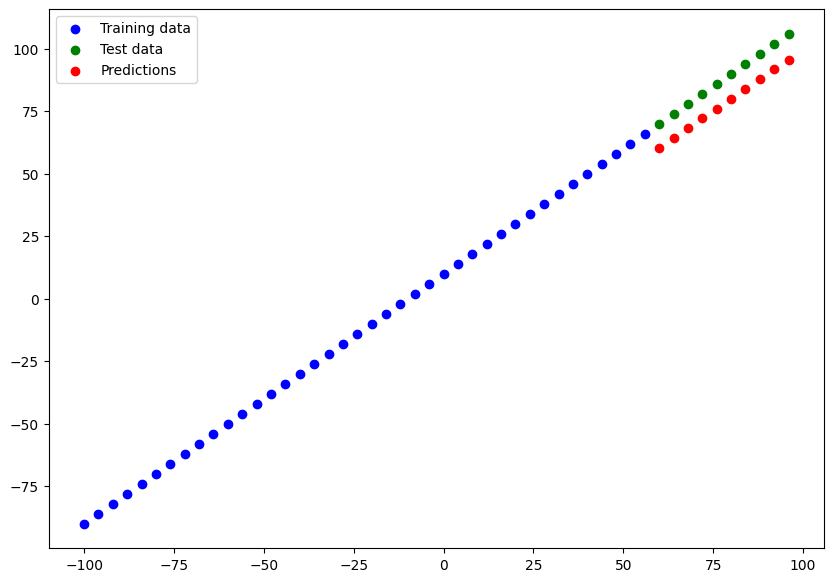

In [45]:
y_preds_1 = model_1.predict(X_test)
plot_prediction(X_train, y_train, X_test, y_test, y_preds_1)

In [46]:
mae(y_test, y_preds_1), mse(y_test, y_preds_1)

(<tf.Tensor: shape=(), dtype=float32, numpy=9.954866>,
 <tf.Tensor: shape=(), dtype=float32, numpy=99.14524>)

In [47]:
tf.random.set_seed(42)

# model_2
# 1. Create a model using the sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)


# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100) 

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 57.9071 - mse: 4887.7192
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 32.9787 - mse: 1967.8756
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 30.4050 - mse: 1282.7654
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 26.4403 - mse: 993.6153
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 24.9540 - mse: 992.2935
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 20.2914 - mse: 588.9968
Epoch 7/100
2/2 [==============================] - 0s 1ms/step - loss: 20.5025 - mse: 641.1181
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 19.7200 - mse: 590.4182
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 18.0652 - mse: 500.4809
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 21.0548 - mse: 706.6479
Epoch 11/100
2/2 [============================

2/2 [==============================] - 0s 1ms/step - loss: 17.7438 - mse: 540.8337
Epoch 87/100
2/2 [==============================] - 0s 1ms/step - loss: 10.3866 - mse: 151.7618
Epoch 88/100
2/2 [==============================] - 0s 1ms/step - loss: 28.7006 - mse: 1159.2668
Epoch 89/100
2/2 [==============================] - 0s 1ms/step - loss: 8.2618 - mse: 94.6563
Epoch 90/100
2/2 [==============================] - 0s 1ms/step - loss: 11.7733 - mse: 217.4576
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 21.8225 - mse: 719.5489
Epoch 92/100
2/2 [==============================] - 0s 1ms/step - loss: 19.7805 - mse: 608.7403
Epoch 93/100
2/2 [==============================] - 0s 1ms/step - loss: 21.5743 - mse: 770.4922
Epoch 94/100
2/2 [==============================] - 0s 1ms/step - loss: 19.5485 - mse: 510.0741
Epoch 95/100
2/2 [==============================] - 0s 1ms/step - loss: 25.5400 - mse: 1074.8885
Epoch 96/100
2/2 [==============================] - 0

1/1 [==============================] - 0s 29ms/step


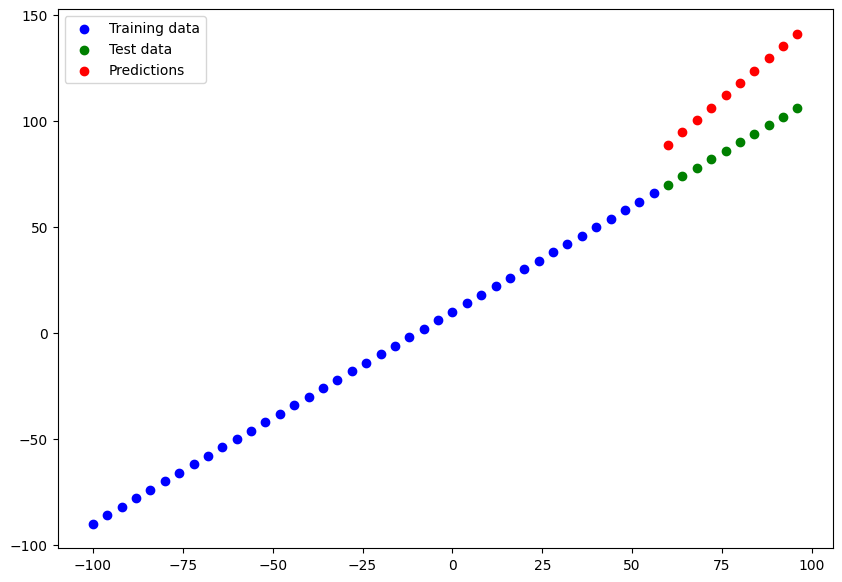

In [48]:
y_preds_2 = model_2.predict(X_test)
plot_prediction(X_train, y_train, X_test, y_test, y_preds_2)

In [49]:
mae(y_test, y_preds_2), mse(y_test, y_preds_2)

(<tf.Tensor: shape=(), dtype=float32, numpy=27.059528>,
 <tf.Tensor: shape=(), dtype=float32, numpy=759.19446>)

In [50]:
tf.random.set_seed(42)

# model_3
# 1. Create a model using the sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(
    loss=tf.keras.losses.mae, # mean absolute error
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)


# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=500) 

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 58.3817 - mse: 5389.0474
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 32.3329 - mse: 1853.2344
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 30.1198 - mse: 1251.2225
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 26.2973 - mse: 965.9125
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 24.7486 - mse: 960.6692
Epoch 6/500
2/2 [==============================] - 0s 1ms/step - loss: 20.2898 - mse: 587.4929
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 20.1011 - mse: 615.2327
Epoch 8/500
2/2 [==============================] - 0s 2ms/step - loss: 21.0755 - mse: 669.7029
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 10.0225 - mse: 133.2068
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 10.1325 - mse: 117.9383
Epoch 11/500
2/2 [============================

2/2 [==============================] - 0s 2ms/step - loss: 21.6061 - mse: 742.0670
Epoch 87/500
2/2 [==============================] - 0s 2ms/step - loss: 16.0735 - mse: 466.8061
Epoch 88/500
2/2 [==============================] - 0s 1ms/step - loss: 19.6282 - mse: 554.8384
Epoch 89/500
2/2 [==============================] - 0s 1ms/step - loss: 19.4143 - mse: 592.2121
Epoch 90/500
2/2 [==============================] - 0s 1ms/step - loss: 37.3952 - mse: 1922.5244
Epoch 91/500
2/2 [==============================] - 0s 1ms/step - loss: 17.6371 - mse: 494.7198
Epoch 92/500
2/2 [==============================] - 0s 1ms/step - loss: 20.1561 - mse: 630.1750
Epoch 93/500
2/2 [==============================] - 0s 1ms/step - loss: 21.9417 - mse: 718.9625
Epoch 94/500
2/2 [==============================] - 0s 1ms/step - loss: 24.5814 - mse: 945.0726
Epoch 95/500
2/2 [==============================] - 0s 1ms/step - loss: 29.4640 - mse: 1129.5378
Epoch 96/500
2/2 [==============================] -

2/2 [==============================] - 0s 2ms/step - loss: 25.7848 - mse: 946.3292
Epoch 171/500
2/2 [==============================] - 0s 2ms/step - loss: 7.4603 - mse: 60.5759
Epoch 172/500
2/2 [==============================] - 0s 2ms/step - loss: 17.6735 - mse: 572.7195
Epoch 173/500
2/2 [==============================] - 0s 2ms/step - loss: 17.8230 - mse: 456.6967
Epoch 174/500
2/2 [==============================] - 0s 2ms/step - loss: 27.3526 - mse: 1074.0122
Epoch 175/500
2/2 [==============================] - 0s 2ms/step - loss: 26.0736 - mse: 979.1309
Epoch 176/500
2/2 [==============================] - 0s 1ms/step - loss: 13.4781 - mse: 316.7943
Epoch 177/500
2/2 [==============================] - 0s 1ms/step - loss: 25.4821 - mse: 1026.0162
Epoch 178/500
2/2 [==============================] - 0s 1ms/step - loss: 8.0066 - mse: 88.6649
Epoch 179/500
2/2 [==============================] - 0s 1ms/step - loss: 34.6566 - mse: 1605.1422
Epoch 180/500
2/2 [==========================

2/2 [==============================] - 0s 1ms/step - loss: 22.4787 - mse: 822.4863
Epoch 255/500
2/2 [==============================] - 0s 1ms/step - loss: 31.6138 - mse: 1325.5503
Epoch 256/500
2/2 [==============================] - 0s 1ms/step - loss: 20.0486 - mse: 574.4894
Epoch 257/500
2/2 [==============================] - 0s 1ms/step - loss: 22.6241 - mse: 872.4046
Epoch 258/500
2/2 [==============================] - 0s 1ms/step - loss: 16.8948 - mse: 660.1567
Epoch 259/500
2/2 [==============================] - 0s 1ms/step - loss: 20.6236 - mse: 620.5749
Epoch 260/500
2/2 [==============================] - 0s 1ms/step - loss: 22.8953 - mse: 731.1324
Epoch 261/500
2/2 [==============================] - 0s 1ms/step - loss: 17.4542 - mse: 434.6778
Epoch 262/500
2/2 [==============================] - 0s 1ms/step - loss: 30.6754 - mse: 1328.1382
Epoch 263/500
2/2 [==============================] - 0s 1ms/step - loss: 23.8067 - mse: 830.7668
Epoch 264/500
2/2 [=======================

2/2 [==============================] - 0s 1ms/step - loss: 17.0058 - mse: 557.5720
Epoch 339/500
2/2 [==============================] - 0s 1ms/step - loss: 6.1587 - mse: 50.6994
Epoch 340/500
2/2 [==============================] - 0s 1ms/step - loss: 21.0293 - mse: 723.8964
Epoch 341/500
2/2 [==============================] - 0s 1ms/step - loss: 17.7447 - mse: 638.1331
Epoch 342/500
2/2 [==============================] - 0s 1ms/step - loss: 22.2224 - mse: 845.1245
Epoch 343/500
2/2 [==============================] - 0s 1ms/step - loss: 6.4777 - mse: 54.1904
Epoch 344/500
2/2 [==============================] - 0s 1ms/step - loss: 51.4615 - mse: 3980.1772
Epoch 345/500
2/2 [==============================] - 0s 1ms/step - loss: 21.2103 - mse: 925.1848
Epoch 346/500
2/2 [==============================] - 0s 1ms/step - loss: 21.9729 - mse: 861.9265
Epoch 347/500
2/2 [==============================] - 0s 1ms/step - loss: 34.1115 - mse: 1590.7152
Epoch 348/500
2/2 [===========================

2/2 [==============================] - 0s 1ms/step - loss: 18.8570 - mse: 577.8575
Epoch 423/500
2/2 [==============================] - 0s 1ms/step - loss: 27.4706 - mse: 1023.7539
Epoch 424/500
2/2 [==============================] - 0s 1ms/step - loss: 31.3628 - mse: 1338.3621
Epoch 425/500
2/2 [==============================] - 0s 1ms/step - loss: 5.4748 - mse: 41.6853
Epoch 426/500
2/2 [==============================] - 0s 1ms/step - loss: 33.0655 - mse: 1474.3391
Epoch 427/500
2/2 [==============================] - 0s 1ms/step - loss: 20.7778 - mse: 683.7969
Epoch 428/500
2/2 [==============================] - 0s 1ms/step - loss: 16.5173 - mse: 395.3237
Epoch 429/500
2/2 [==============================] - 0s 1ms/step - loss: 31.9916 - mse: 1469.0450
Epoch 430/500
2/2 [==============================] - 0s 1ms/step - loss: 20.2146 - mse: 661.2938
Epoch 431/500
2/2 [==============================] - 0s 1ms/step - loss: 10.5295 - mse: 243.8998
Epoch 432/500
2/2 [=======================

1/1 [==============================] - 0s 23ms/step


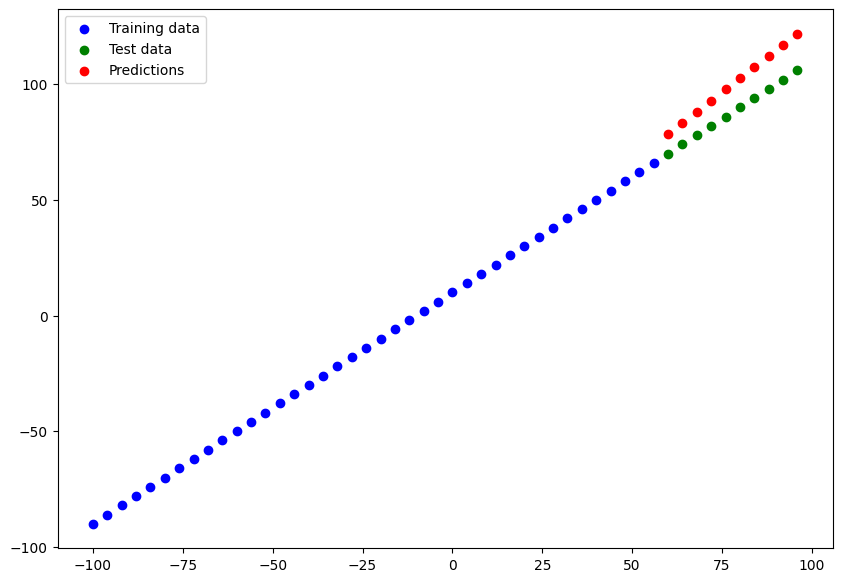

In [51]:
y_preds_3 = model_3.predict(X_test)
plot_prediction(X_train, y_train, X_test, y_test, y_preds_3)

In [52]:
mae(y_test, y_preds_3), mse(y_test, y_preds_3)

(<tf.Tensor: shape=(), dtype=float32, numpy=12.144205>,
 <tf.Tensor: shape=(), dtype=float32, numpy=152.936>)

In [56]:
# Comparing the three models
import pandas as pd

model_results = [
    ["model1", mae(y_test, y_preds_1).numpy(), mse(y_test, y_preds_1).numpy()],
    ["model2", mae(y_test, y_preds_2).numpy(), mse(y_test, y_preds_2).numpy()],
    ["model3", mae(y_test, y_preds_3).numpy(), mse(y_test, y_preds_3).numpy()]
]

pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])

,Model,MAE,MSE
0,model1,9.954866,99.145241
1,model2,27.059528,759.194458
2,model3,12.144205,152.936005


### Tracking experiments

Tools for tracking experiments:
* TensorBoard: A component of the TensorFlow library
* Weights and Biases: A tool for tracking all kinds of Machine Learning experiments